In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
meta = pd.read_csv(
    'meta-features/data_complexity_cleaned.csv', index_col=0
)[
    ['F1', 'F2' , 'F3', 'F4', 'L1', 'L2', 'L3', 'N1', 'N2', 'N3', 'N4' , 'T1', 'T2']
]  # only complexity features
diff = pd.read_csv('parameters/difficulties-b3-beta-irt-gd-data-cleaned.csv', index_col=0) 
disc = pd.read_csv('parameters/discriminations-b3-beta-irt-gd-data-cleaned.csv', index_col=0) 
feat = pd.concat([meta, diff, disc], axis=1) 


In [3]:
feat

,F1,F2,F3,F4,L1,L2,L3,N1,N2,N3,N4,T1,T2,difficulty,discrimination
fri_c0_500_5.arff,0.907012,0.854743,0.940000,0.858000,0.122403,0.164000,0.172000,0.304000,0.402484,0.186000,0.312000,0.516000,0.010000,0.321508,0.885672
vertebra-column_phpZeLjnh.arff,0.888995,0.005327,0.641935,0.548387,0.076951,0.148387,0.090323,0.332258,0.413275,0.209677,0.222581,0.535484,0.019355,0.350945,0.815734
fri_c1_1000_25.arff,0.991210,0.744116,0.951000,0.841000,0.164067,0.320000,0.293000,0.531000,0.490479,0.349000,0.284000,1.000000,0.025000,0.432341,1.011388
fri_c2_100_25.arff,0.969632,0.311069,0.920000,0.000000,0.155876,0.170000,0.110000,0.550000,0.490329,0.410000,0.210000,1.000000,0.250000,0.441393,0.827308
chatfield_4.arff,0.571570,0.000047,0.370213,0.106383,0.060683,0.068085,0.051064,0.234043,0.363660,0.148936,0.195745,0.459574,0.051064,0.363318,1.141250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D62-trn.arff,0.996120,0.002124,0.378082,0.000000,0.164760,0.197260,0.197260,0.383562,0.476213,0.241096,0.147945,0.997260,0.054795,0.557141,1.128517
D63-trn.arff,0.995777,0.001944,0.326861,0.000000,0.155738,0.184466,0.184466,0.453074,0.486582,0.336570,0.132686,0.996764,0.064725,0.515289,0.985069
D116-trn.arff,0.973377,0.042456,0.850000,0.520000,0.136758,0.140000,0.150000,0.496667,0.485307,0.316667,0.283333,1.000000,0.066667,0.374913,0.829248
D230-trn.arff,0.975498,0.004244,0.552174,0.291304,0.055736,0.065217,0.065217,0.117391,0.359024,0.056522,0.078261,0.247826,0.034783,0.503117,0.403415


In [4]:
print(
    feat.corr(method='spearman')[
        ['difficulty', 'discrimination']
    ].to_latex(float_format="%.3f")
)

\begin{tabular}{lrr}
\toprule
 & difficulty & discrimination \\
\midrule
F1 & 0.574 & -0.344 \\
F2 & -0.036 & -0.109 \\
F3 & 0.092 & -0.312 \\
F4 & -0.013 & -0.258 \\
L1 & 0.274 & -0.121 \\
L2 & 0.210 & -0.099 \\
L3 & 0.259 & -0.111 \\
N1 & 0.202 & -0.178 \\
N2 & 0.274 & -0.281 \\
N3 & 0.264 & -0.301 \\
N4 & -0.198 & 0.186 \\
T1 & 0.164 & -0.107 \\
T2 & 0.167 & -0.115 \\
difficulty & 1.000 & -0.630 \\
discrimination & -0.630 & 1.000 \\
\bottomrule
\end{tabular}



In [5]:
print(
    feat['difficulty'].idxmin(),
    feat['difficulty'].idxmax()
)

print(feat.loc[feat['difficulty'].idxmin()].to_latex(float_format="%.3f"))
print(feat.loc[feat['difficulty'].idxmax()].to_latex(float_format="%.3f"))

balance-scale.arff autoUniv-au6-400_phpmxH8g0.arff
\begin{tabular}{lr}
\toprule
 & balance-scale.arff \\
\midrule
F1 & 0.843 \\
F2 & 1.000 \\
F3 & 1.000 \\
F4 & 1.000 \\
L1 & 0.057 \\
L2 & 0.048 \\
L3 & 0.082 \\
N1 & 0.240 \\
N2 & 0.350 \\
N3 & 0.126 \\
N4 & 0.278 \\
T1 & 0.237 \\
T2 & 0.006 \\
difficulty & 0.215 \\
discrimination & 0.978 \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
 & autoUniv-au6-400_phpmxH8g0.arff \\
\midrule
F1 & 0.981 \\
F2 & 0.083 \\
F3 & 0.844 \\
F4 & 0.000 \\
L1 & 0.091 \\
L2 & 0.077 \\
L3 & 0.174 \\
N1 & 0.897 \\
N2 & 0.523 \\
N3 & 0.800 \\
N4 & 0.420 \\
T1 & 1.000 \\
T2 & 0.100 \\
difficulty & 0.858 \\
discrimination & 0.967 \\
\bottomrule
\end{tabular}



count    509.000000
mean       0.460129
std        0.111129
min        0.214504
25%        0.380211
50%        0.461393
75%        0.529604
max        0.857744
Name: difficulty, dtype: float64
count    95.000000
mean      0.713260
std       0.107380
min       0.395258
25%       0.632658
50%       0.726095
75%       0.801305
max       0.883174
Name: ability, dtype: float64
                   ability  average_response
ability           1.000000          0.997606
average_response  0.997606          1.000000


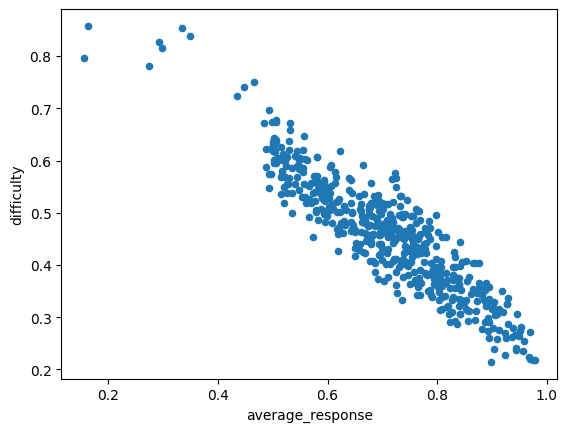

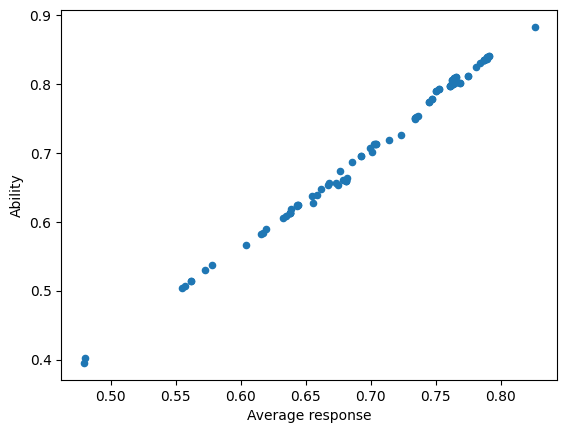

In [7]:
responses = pd.read_csv('responses/BAC_data_cleaned.csv', header=0, index_col=0)

feat_res = pd.concat([feat, responses.mean(axis=1)], axis=1).rename(columns={0: 'average_response'})
ax = feat_res.plot.scatter('average_response', 'difficulty')
ax.figure.savefig('average_response-difficulty.png')

print(feat_res['difficulty'].describe())

abilities = pd.read_csv('parameters/abilities-b3-beta-irt-gd-data-cleaned.csv', header=0, index_col=0)

abil_res = pd.concat([abilities, responses.mean(axis=0)], axis=1).rename(columns={0: 'average_response'})
ax = abil_res.plot.scatter('average_response', 'ability')
ax.set_xlabel('Average response')
ax.set_ylabel('Ability')
ax.figure.savefig('average_response-ability.png')

print(abil_res['ability'].describe())

print(abil_res.corr('spearman'))

In [8]:
print(
    abilities['ability'].idxmin(),
    abilities['ability'].idxmax()
)

print(abilities.loc[abilities['ability'].idxmin()].to_latex(float_format="%.3f"))
print(abilities.loc[abilities['ability'].idxmax()].to_latex(float_format="%.3f"))

dummy_param=((strategy=uniform),) tabpfn_param=((),)
\begin{tabular}{lr}
\toprule
 & dummy_param=((strategy=uniform),) \\
\midrule
ability & 0.395 \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
 & tabpfn_param=((),) \\
\midrule
ability & 0.883 \\
\bottomrule
\end{tabular}



[15  2  1 13 12 14 11  4  3  7 17  0 10  6  8  9  5 16]


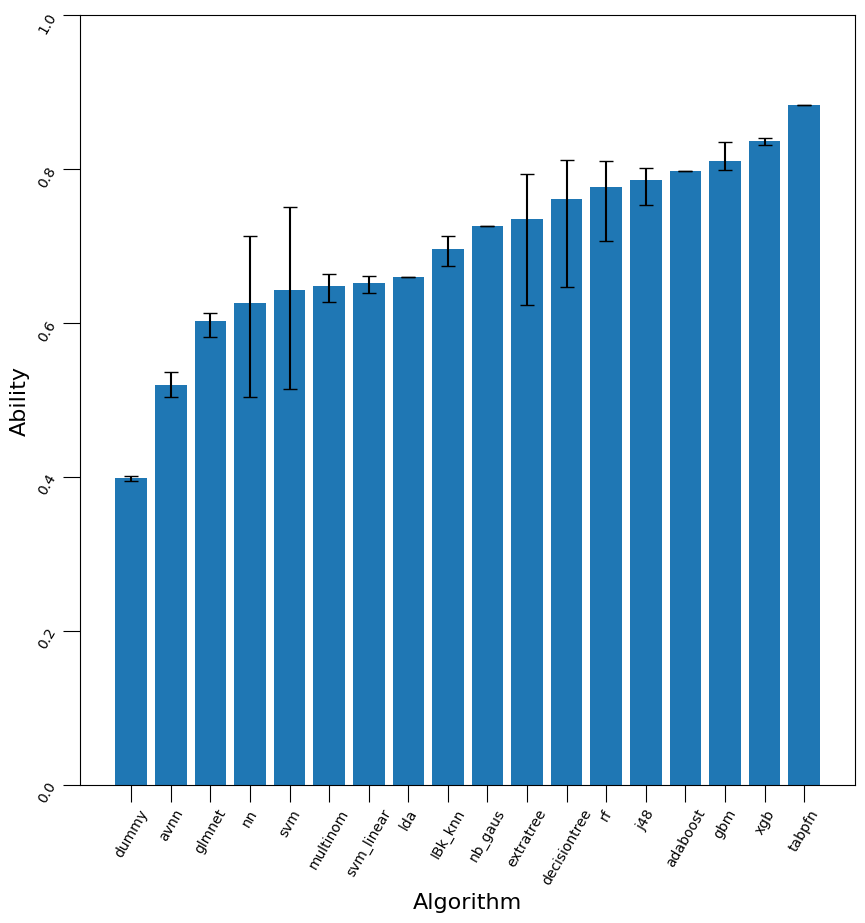

In [9]:
classifiers = list(set([c.split('_param')[0] for c in abilities.index]))

grouped_abilities = {
    c: [abilities.loc[c_]['ability'] for c_ in abilities.index if c in c_] for c in classifiers
} 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

means = np.array([np.mean(grouped_abilities[c]) for c in classifiers])
idx_sort = np.argsort(means)
print(idx_sort)

yerr = np.zeros((2, len(classifiers)))

yerr[0,:] = (means - np.array([np.min(grouped_abilities[c]) for c in classifiers]))[idx_sort]
yerr[1,:] = (np.array([np.max(grouped_abilities[c]) for c in classifiers]) - means)[idx_sort]

ax.bar(
    range(len(classifiers)), 
    means[idx_sort],
    yerr=yerr,
    capsize=5,
    tick_label=[classifiers[i] for i in idx_sort]
)

ax.tick_params(rotation=60, size=12)
ax.set_xlabel('Algorithm', fontsize=16)
ax.set_ylabel('Ability', fontsize=16)
ax.set_ylim([0,1])
# ax.set_xticklabels(classifiers, rotation=60)
fig.savefig('grouped-abilities.png', bbox_inches='tight')

In [10]:
from sklearn.metrics import r2_score

y_pred = responses.copy(deep=True)

for dataset in feat.index:
    d = feat.loc[dataset]['difficulty']
    a = feat.loc[dataset]['discrimination']
    for model in abilities.index:
        t = abilities.loc[model]['ability']
        y_pred.loc[dataset][model] = 1 / (1 + (d/(1-d))**a * (t/(1-t))**-a)

print(r2_score(responses.values.flatten(), y_pred.values.flatten()))

0.8105336805264544


In [11]:
abil_ds = pd.concat([abilities, responses.loc['balance-scale.arff']], axis=1).rename(columns={'balance-scale.arff': 'average_response'})
for index, row in abil_ds.iterrows():
    print(f'({row["ability"]}, {row["average_response"]})')

(0.69541496, 0.8624)
(0.69541496, 0.8624)
(0.71380174, 0.9352)
(0.6741829, 0.9257)
(0.7130298, 0.894)
(0.68697727, 0.894)
(0.79792947, 0.8638)
(0.7978896, 0.8638)
(0.7979108, 0.8638)
(0.5036552, 0.9493)
(0.5368238, 0.9476)
(0.75266945, 0.748)
(0.64756274, 0.7255)
(0.81235236, 0.8615)
(0.7785777, 0.8783)
(0.812346, 0.8615)
(0.77854997, 0.8783)
(0.7488617, 0.7369)
(0.6530489, 0.7206)
(0.7982271, 0.864)
(0.7742764, 0.8627)
(0.79823244, 0.864)
(0.77428174, 0.8627)
(0.4017074, 0.5)
(0.39525768, 0.5292)
(0.6239003, 0.8989)
(0.79337704, 0.8714)
(0.7933829, 0.8714)
(0.6236942, 0.9003)
(0.79002535, 0.8758)
(0.79002684, 0.8758)
(0.83486044, 0.9103)
(0.80010307, 0.8618)
(0.80011064, 0.8618)
(0.83498144, 0.9263)
(0.8024994, 0.8618)
(0.8024093, 0.8618)
(0.82491606, 0.9053)
(0.7986043, 0.8618)
(0.7985946, 0.8618)
(0.5839851, 0.9493)
(0.60846776, 0.9493)
(0.6133455, 0.9493)
(0.58963346, 0.9493)
(0.6127829, 0.9493)
(0.6133587, 0.9493)
(0.582234, 0.9493)
(0.60597074, 0.9493)
(0.6133455, 0.9493)
(0.7535

In [12]:
abil_ds = pd.concat([abilities, responses.loc['autoUniv-au6-400_phpmxH8g0.arff']], axis=1).rename(columns={'autoUniv-au6-400_phpmxH8g0.arff': 'average_response'})
for index, row in abil_ds.iterrows():
    print(f'({row["ability"]}, {row["average_response"]})')

(0.69541496, 0.1327)
(0.69541496, 0.1327)
(0.71380174, 0.1574)
(0.6741829, 0.1389)
(0.7130298, 0.1489)
(0.68697727, 0.1519)
(0.79792947, 0.1999)
(0.7978896, 0.1999)
(0.7979108, 0.1999)
(0.5036552, 0.1344)
(0.5368238, 0.1386)
(0.75266945, 0.244)
(0.64756274, 0.1185)
(0.81235236, 0.2549)
(0.7785777, 0.1338)
(0.812346, 0.2549)
(0.77854997, 0.1338)
(0.7488617, 0.2138)
(0.6530489, 0.1211)
(0.7982271, 0.2557)
(0.7742764, 0.1404)
(0.79823244, 0.2557)
(0.77428174, 0.1404)
(0.4017074, 0.125)
(0.39525768, 0.1156)
(0.6239003, 0.1389)
(0.79337704, 0.1549)
(0.7933829, 0.1549)
(0.6236942, 0.142)
(0.79002535, 0.1588)
(0.79002684, 0.1588)
(0.83486044, 0.2314)
(0.80010307, 0.1744)
(0.80011064, 0.1744)
(0.83498144, 0.2083)
(0.8024994, 0.1755)
(0.8024093, 0.1755)
(0.82491606, 0.2287)
(0.7986043, 0.1704)
(0.7985946, 0.1704)
(0.5839851, 0.1185)
(0.60846776, 0.1185)
(0.6133455, 0.1185)
(0.58963346, 0.1185)
(0.6127829, 0.1185)
(0.6133587, 0.1185)
(0.582234, 0.1185)
(0.60597074, 0.1185)
(0.6133455, 0.1185)
(0

In [13]:
from scipy.stats import spearmanr

def calculate_pvalues(df):
    df_cols = pd.DataFrame(columns=df.columns)
    pvalues = df_cols.transpose().join(df_cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 6)
    return pvalues

calculate_pvalues(feat)[['difficulty', 'discrimination']] 

,difficulty,discrimination
F1,0.0,0.0
F2,0.422482,0.014314
F3,0.038937,0.0
F4,0.762472,0.0
L1,0.0,0.006095
L2,0.000002,0.025551
L3,0.0,0.011848
N1,0.000004,0.000056
N2,0.0,0.0
N3,0.0,0.0


In [14]:
from sklearn.preprocessing import Normalizer
np.random.seed(42)

feat_norm = Normalizer().transform(feat.drop(['difficulty', 'discrimination'], axis=1))
pca = PCA(n_components=2)
meta_trans = pca.fit_transform(feat_norm)
pd.DataFrame(meta_trans, columns=['X1', 'X2'], index=feat.index).to_csv('pca.csv')

/mnt/c/Users/td15392/Documents/git/irt-instance-space/venv-irt-dataset/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [15]:
print(
    pd.DataFrame(
        pca.components_.transpose(), 
        columns=['X1', 'X2'], 
        index=meta.columns
    ).to_latex(float_format="%.3f")
)
print(np.sum(pca.explained_variance_ratio_))

\begin{tabular}{lrr}
\toprule
 & X1 & X2 \\
\midrule
F1 & -0.271 & 0.508 \\
F2 & 0.296 & -0.096 \\
F3 & 0.416 & 0.013 \\
F4 & 0.714 & -0.063 \\
L1 & 0.042 & -0.091 \\
L2 & 0.080 & -0.158 \\
L3 & 0.068 & -0.147 \\
N1 & 0.020 & -0.356 \\
N2 & -0.175 & -0.082 \\
N3 & -0.009 & -0.273 \\
N4 & 0.036 & -0.006 \\
T1 & -0.324 & -0.682 \\
T2 & -0.080 & -0.023 \\
\bottomrule
\end{tabular}

0.6991277466301578


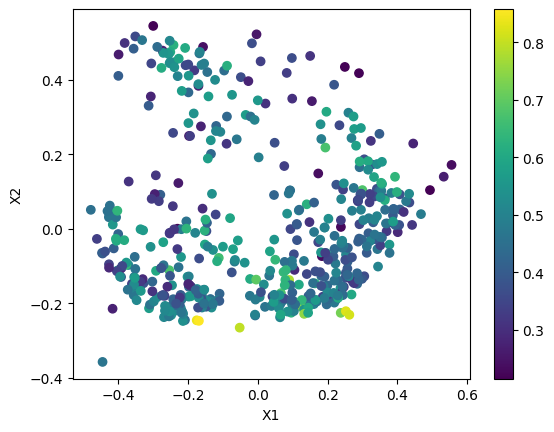

In [ ]:
plt.scatter(meta_trans[:,0], meta_trans[:,1], c=feat['difficulty'].values.flatten())
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('pca-beta-diff-bac-data-cleaned.png')

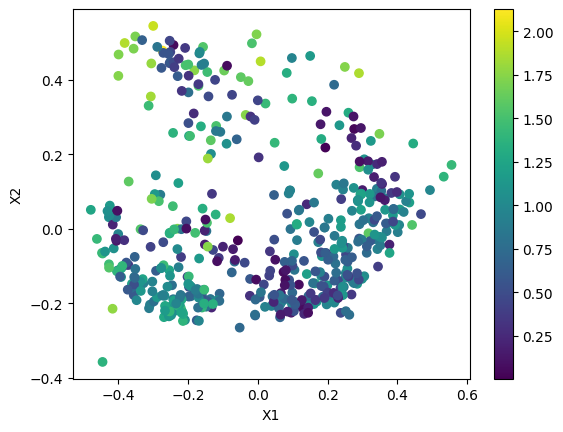

In [18]:
plt.scatter(meta_trans[:,0], meta_trans[:,1], c=feat['discrimination'].values.flatten())
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('pca-beta-disc-bac-data-cleaned.png')

In [19]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from tqdm import tqdm
from scipy.stats import ttest_1samp
import warnings
import xgboost

models = {
    'LR': LinearRegression,
    'lasso': Lasso,
    'ridge': Ridge,
    'adaboost': AdaBoostRegressor,
    'svr': SVR,
    'DT': DecisionTreeRegressor,
    'knn': KNeighborsRegressor,
    'xgb': xgboost.XGBRegressor

}

warnings.simplefilter("ignore")

def nmae(y_true, y_pred):
    m = y_true.mean()
    frac = np.abs(y_true - y_pred).sum()/np.abs(y_true - m).sum()
    return frac

def evaluate(x_train, y_train, x_test, y_test, param):
    results = []
    for model in models:
        pred = models[model]().fit(x_train, y_train).predict(x_test)
        results.append([model, param, nmae(y_test, pred)])
    return results

nmae_scorer = make_scorer(nmae, greater_is_better=False)

def test(x):
    p = ttest_1samp(x, 1.0).pvalue / 2
    if np.mean(x) > 1:
        return 1 - p
    else:
        return p

In [20]:
mc_iterations = 10
n_folds = 10

X = feat.drop(['difficulty', 'discrimination'], axis=1).values
y_diff = feat['difficulty'].values.ravel()
y_disc = feat['discrimination'].values.ravel()
results_original = []
for mc in tqdm(range(mc_iterations)):
    np.random.seed(mc)
    kf = KFold(n_splits=n_folds, shuffle=True)
    for train_index, test_index in kf.split(X, y_diff):
        x_train, y_train = X[train_index], y_diff[train_index]
        x_test, y_test = X[test_index], y_diff[test_index]
        results_original.extend(evaluate(x_train, y_train, x_test, y_test, 'difficulty'))
    np.random.seed(mc)
    kf = KFold(n_splits=n_folds, shuffle=True)
    for train_index, test_index in kf.split(X, y_disc):
        x_train, y_train = X[train_index], y_disc[train_index]
        x_test, y_test = X[test_index], y_disc[test_index]
        results_original.extend(evaluate(x_train, y_train, x_test, y_test, 'discrimination'))
    
results_original = pd.DataFrame(data=results_original, columns=['model', 'parameter', 'NMAE']) 

100%|██████████| 10/10 [09:56<00:00, 59.63s/it]


In [21]:
df = pd.pivot_table(
        results_original, 
        index='model', 
        values='NMAE', 
        columns='parameter', 
        aggfunc=[np.mean, np.std, test]
    )

for index, row in df.iterrows():
    print(f'{index} & ${row["mean"]["difficulty"]:.3f} \pm {row["std"]["difficulty"]:.3f}$ (${row["test"]["difficulty"]:.3f}$) & ${row["mean"]["discrimination"]:.3f} \pm {row["std"]["discrimination"]:.3f}$ (${row["test"]["discrimination"]:.3f}$) \\\\')
    

DT & $0.702 \pm 0.106$ ($0.000$) & $0.573 \pm 0.094$ ($0.000$) \\
LR & $0.821 \pm 0.082$ ($0.000$) & $0.661 \pm 0.081$ ($0.000$) \\
adaboost & $0.677 \pm 0.064$ ($0.000$) & $0.620 \pm 0.070$ ($0.000$) \\
knn & $0.682 \pm 0.088$ ($0.000$) & $0.555 \pm 0.092$ ($0.000$) \\
lasso & $1.009 \pm 0.018$ ($1.000$) & $1.012 \pm 0.025$ ($1.000$) \\
ridge & $0.837 \pm 0.069$ ($0.000$) & $0.680 \pm 0.073$ ($0.000$) \\
svr & $0.677 \pm 0.068$ ($0.000$) & $0.519 \pm 0.073$ ($0.000$) \\
xgb & $0.531 \pm 0.069$ ($0.000$) & $0.440 \pm 0.063$ ($0.000$) \\


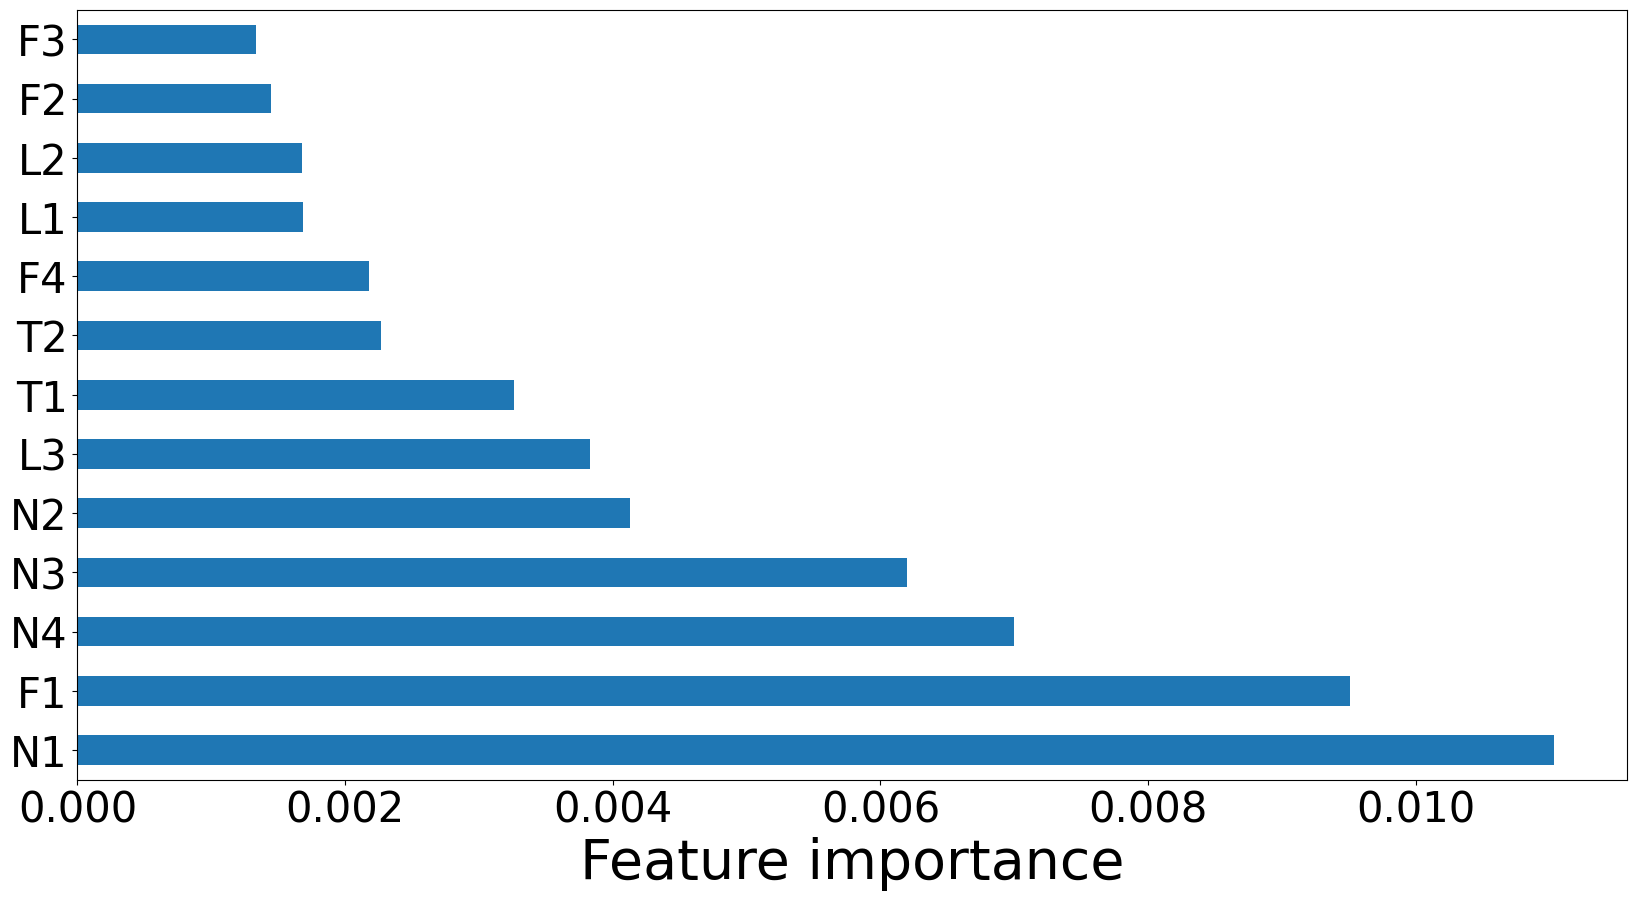

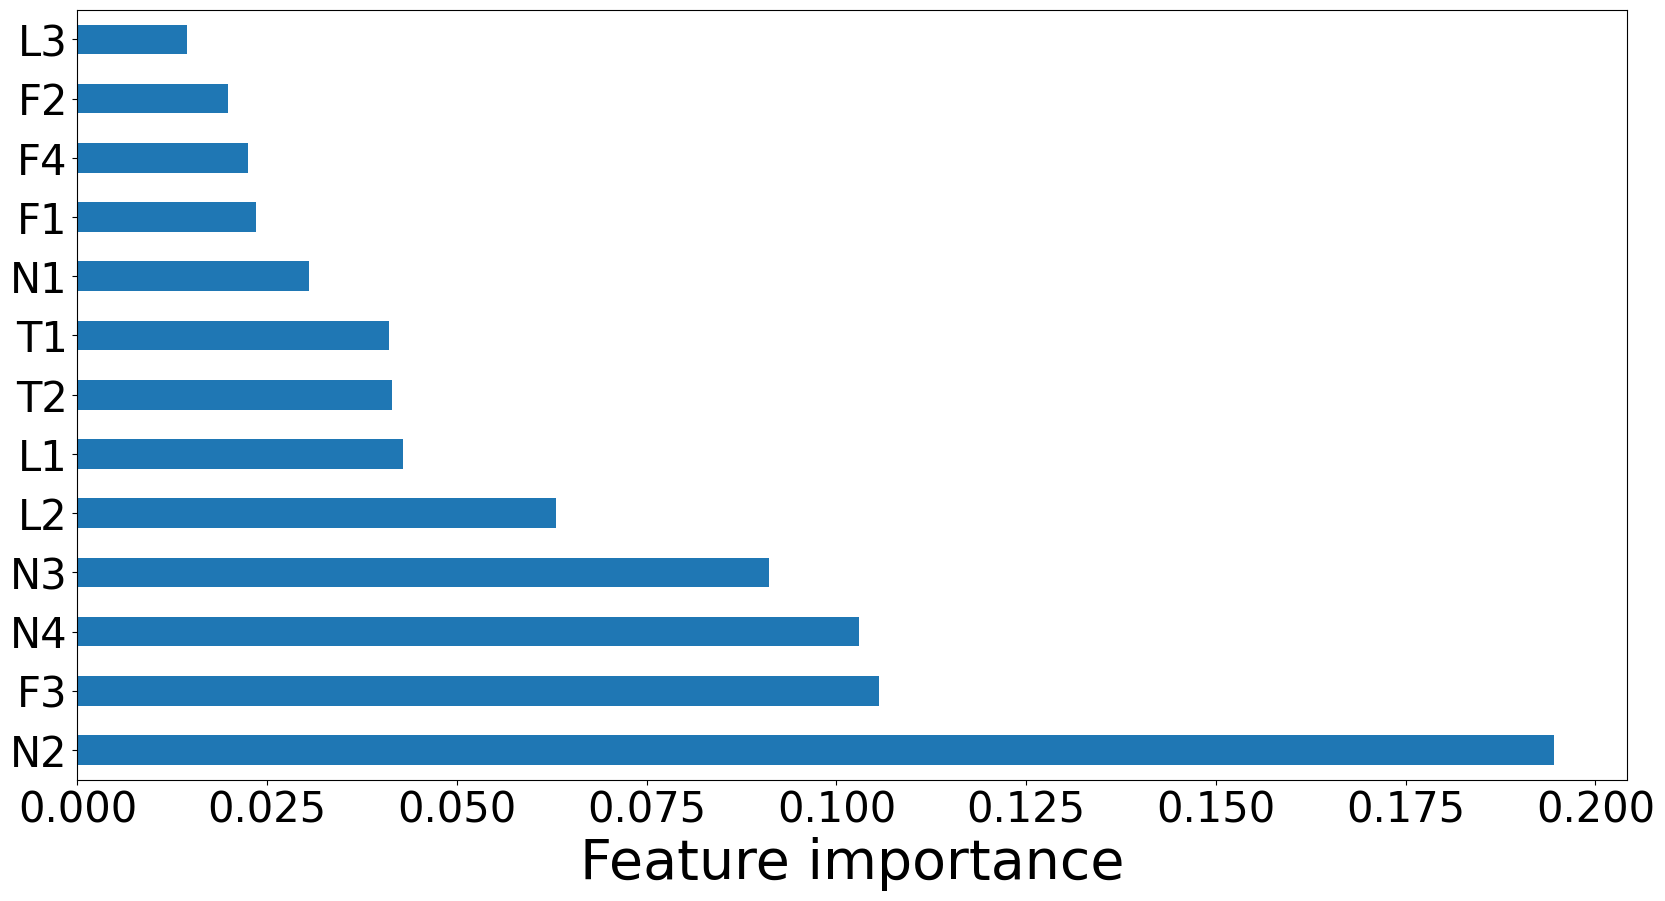

In [22]:
from pickle import dump

def plot_xgb_importances(model, filename):
    feature_important = model.get_booster().get_score(importance_type='gain')
    keys = list(feature_important.keys())
    values = list(feature_important.values())

    data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
    ax = data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10), legend=False)
    ax.set_xlabel('Feature importance', fontsize=40)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=30)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
    ax.figure.savefig(filename)

xgb_diff = xgboost.XGBRegressor().fit(feat.drop(['difficulty', 'discrimination'], axis=1), y_diff)
plot_xgb_importances(xgb_diff, 'diff-feature-importances.png')

with open("xgb_difficulty.pkl", "wb") as f:
    dump(xgb_diff, f, protocol=5)

xgb_disc = xgboost.XGBRegressor().fit(feat.drop(['difficulty', 'discrimination'], axis=1), y_disc)
plot_xgb_importances(xgb_disc, 'disc-feature-importances.png')

with open("xgb_discrimination.pkl", "wb") as f:
    dump(xgb_disc, f, protocol=5)